<a href="https://colab.research.google.com/github/OlyMahmudMugdho/supervised-learning-notes/blob/main/random_forest_regression_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_housing_prices_dataset_path = kagglehub.dataset_download('yasserh/housing-prices-dataset')

print('Data source import complete.')


In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 2. Load Dataset
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [ ]:
# 3. Data Preprocessing
df.columns = df.columns.str.strip()  # remove whitespace

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# 4. Define features and target
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 6. Feature Scaling (optional for Random Forest, but good for visualization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 7. Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# 8. Predictions
y_pred = rf_reg.predict(X_test_scaled)

In [ ]:
# 9. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 1982702037266.16
Test R²: 0.6077


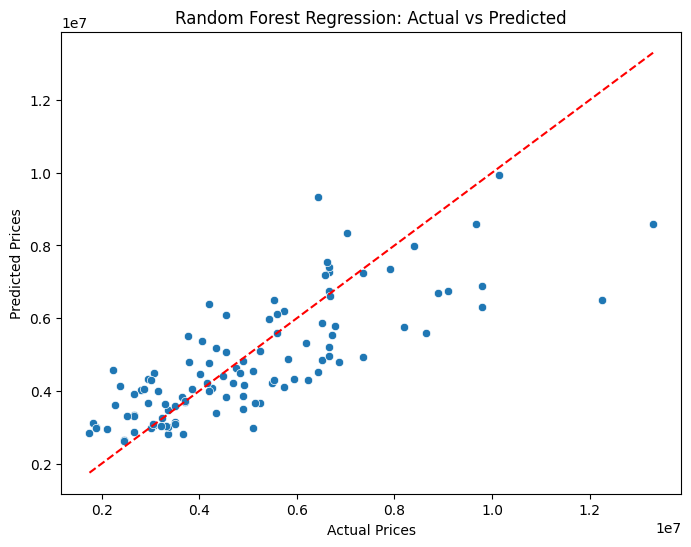

In [ ]:
# 10. Predicted vs Actual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

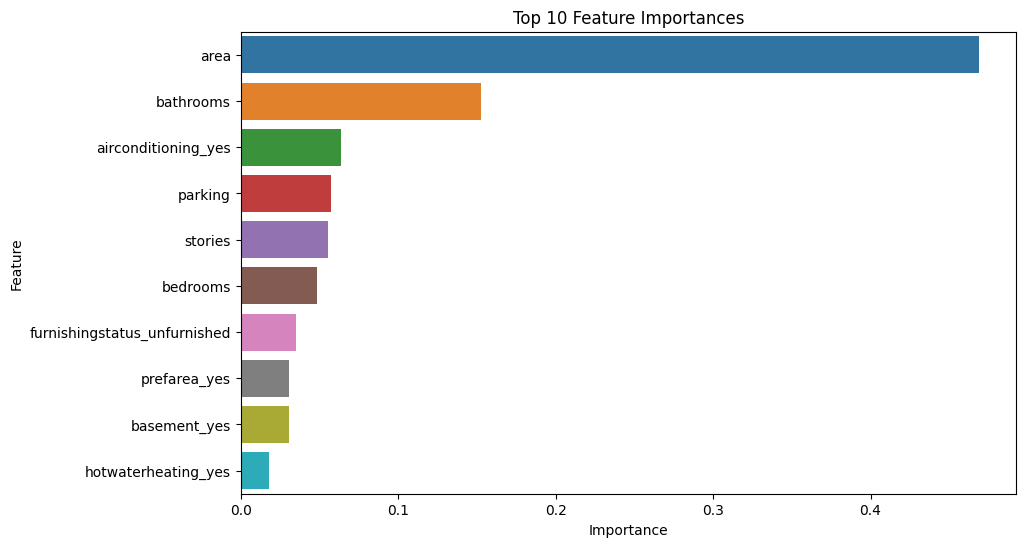

In [ ]:
# 11. Feature Importance
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title("Top 10 Feature Importances")
plt.show()